In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D
import soda


Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
# Function that reads the data from the Analytic integration
#Galactocentic distances and velocities
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

# Host coordinates and velocities
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

# Satellite coordinates and velocities
def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#ICs
def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]

#Function that reads the N-body sumulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    #time = data[:,0]
    #Rgal = data[:,1]
    x_sat= data[:,6]
    y_sat = data[:,7]
    z_sat = data[:,8]
    x_gal = data[:,0]
    y_gal = data[:,1]
    z_gal = data[:,2]
    #Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,3]
    vy_gal = data[:,4]
    vz_gal = data[:,5]
    Rgal= np.sqrt((x_sat-x_gal)**2 + (y_sat-y_gal)**2 + (z_sat-z_gal)**2)
    Vgal= np.sqrt((vx_sat-vx_gal)**2 + (vy_sat-vy_gal)**2 + (vz_sat-vz_gal)**2)

    return Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

    
def best_values(x, y, z, vx, vy, vz):
    """
    Computes the closes value of the N-body orbit to the observed present day LMC positions
    and velocities.
    
    """
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    
    sigma_vx = 13
    sigma_vy = 15
    sigma_vz = 19
    
    dx = x_obs - x[index]
    dy = y_obs - y[index]
    dz = z_obs - z[index]
    
    dvx = vx_obs - vx[index]
    dvy = vy_obs - vy[index]
    dvz = vz_obs - vz[index]
    t = np.linspace(0, 3, 151)

    print('Dr = ', dx, dy, dz, (dx**2 + dy**2 + dz**2)**0.5)
    print('Dv = ', dvx, dvy, dvz, (dvx**2 + dvy**2 + dvz**2)**0.5)
    return t[index], x[index], y[index], z[index], vx[index], vy[index], vz[index]

In [4]:
#

In [5]:
tgal1, xgal1, ygal1, zgal1, vxgal1, vygal1, vzgal1, Rgal1, Vgal1 = reading_data('lmc5_MWHern1')
tNB, RgalNB, xsatNB, ysatNB, zsatNB, xgalNB, ygalNB, zgalNB, vgalNB, vxsatNB,\
vysatNB, vzsatNB, vxgalNB, vygalNB, vzgalNB = reading_Nbody('LMC5_H0.txt')

FileNotFoundError: [Errno 2] No such file or directory: '../../../orbits/data/lmc/lmc5_MWHern1_host.txt'

In [ ]:
ric1, xic1, yic1, zic1, vxic1, vyic1, vzic1, tic1 = ICs(Rgal1, 280, xgal1, ygal1, zgal1, vxgal1, vygal1, vzgal1, tgal1)

In [ ]:
RgNB = np.sqrt((xgalNB-xsatNB)**2.0 + (ygalNB - ysatNB)**2.0 + (zgalNB-zsatNB)**2.0)

In [ ]:
plot(tgal1, Rgal1, lw=2, label='Orbit Integration')
plot(tNB+tic1, RgNB, lw=2, label='N-body')
legend(fontsize=15)

In [ ]:
print 'ICs for analytic iteration to match the Nbody orbit with differentd dfs:'
print 'x:', xsatNB[0]-xgalNB[0]
print 'y:', ysatNB[0]-ygalNB[0]
print 'z:', zsatNB[0]-zgalNB[0]

print 'vx:', vxsatNB[0]-vxgalNB[0]
print 'vy:', vysatNB[0]-vygalNB[0]
print 'vz:', vzsatNB[0]-vzgalNB[0]

In [ ]:
print tNB[-1]

In [ ]:
tgal05, xgal05, ygal05, zgal05, vxgal05, vygal05, vzgal05, Rgal05, Vgal05 = reading_data('lmc5_MWpmdf05')
tgal06, xgal06, ygal06, zgal06, vxgal06, vygal06, vzgal06, Rgal06, Vgal06 = reading_data('lmc5_MWpmdf06')
tgal07, xgal07, ygal07, zgal07, vxgal07, vygal07, vzgal07, Rgal07, Vgal07 = reading_data('lmc5_MWpmdf07')
#tgal15, xgal15, ygal15, zgal15, vxgal15, vygal15, vzgal15, Rgal15, Vgal15 = reading_data('lmc6_MWpmdf15')
#tgal18, xgal18, ygal18, zgal18, vxgal18, vygal18, vzgal18, Rgal18, Vgal18 = reading_data('lmc6_MWpmdf18')
#tgal20, xgal20, ygal20, zgal20, vxgal20, vygal20, vzgal20, Rgal20, Vgal20 = reading_data('lmc6_MWpmdf20')


In [ ]:
figure(figsize=(8, 6))
plot(tNB, RgNB, lw=2 )
plot(tgal05, Rgal05)
plot(tgal06, Rgal06)
plot(tgal07, Rgal07)
#plot(tgal15, Rgal15)
#plot(tgal18, Rgal18)
#plot(tgal20, Rgal20)
#xlim(0.0, 1.4)
ylim(0, 300)

In [ ]:
tgal05b, xgal05b, ygal05b, zgal05b, vxgal05b, vygal05b, vzgal05b, Rgal05b, Vgal05b = reading_data('lmc5_MWpmdf05b')
tgal06b, xgal06b, ygal06b, zgal06b, vxgal06b, vygal06b, vzgal06b, Rgal06b, Vgal06b = reading_data('lmc5_MWpmdf06b')
tgal07b, xgal07b, ygal07b, zgal07b, vxgal07b, vygal07b, vzgal07b, Rgal07b, Vgal07b = reading_data('lmc5_MWpmdf07b')

In [ ]:
plot(tgal05b, Rgal05b, lw=2)
plot(tgal06b, Rgal06b, lw=2)
plot(tgal07b, Rgal07b, lw=2)

In [ ]:
ric05, xic05, yic05, zic05, vxic05, vyic05, vzic05, tic05 = ICs(Rgal05b, 245,  xgal05b, ygal05b, zgal05b, vxgal05b, vygal05b, vzgal05b, tgal05b)
ric06, xic06, yic06, zic06, vxic06, vyic06, vzic06, tic06 = ICs(Rgal06b, 280,  xgal06b, ygal06b, zgal06b, vxgal06b, vygal06b, vzgal06b, tgal06b)
ric07, xic07, yic07, zic07, vxic07, vyic07, vzic07, tic07 = ICs(Rgal07b, 300,  xgal07b, ygal07b, zgal07b, vxgal07b, vygal07b, vzgal07b, tgal07b)

In [ ]:
print xic05, yic05, zic05, vxic05, vyic05, vzic05
print xic06, yic06, zic06, vxic06, vyic06, vzic06
print xic07, yic07, zic07, vxic07, vyic07, vzic07

In [27]:
# Final Results from Nbody from aboce ICs
tNB1, RgalNB1, xsatNB1, ysatNB1, zsatNB1, xgalNB1, ygalNB1, zgalNB1, vgalNB1, vxsatNB1,\
vysatNB1, vzsatNB1, vxgalNB1, vygalNB1, vzgalNB1 = reading_Nbody('LMC5_H1.txt')

tNB2, RgalNB2, xsatNB2, ysatNB2, zsatNB2, xgalNB2, ygalNB2, zgalNB2, vgalNB2, vxsatNB2,\
vysatNB2, vzsatNB2, vxgalNB2, vygalNB2, vzgalNB2 = reading_Nbody('LMC5_H3.txt')

#tNB3, RgalNB3, xsatNB3, ysatNB3, zsatNB3, xgalNB3, ygalNB3, zgalNB3, vgalNB3, vxsatNB3,\
#vysatNB3, vzsatNB3, vxgalNB3, vygalNB3, vzgalNB3 = reading_Nbody('LMC5_H3.txt')

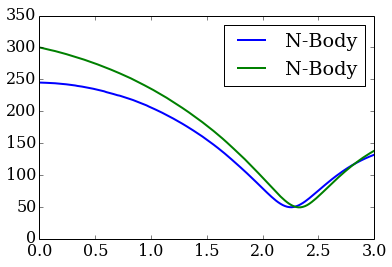

In [28]:
#plot(tgal05b, Rgal05b, lw=2, label='Analytic')
plot(tNB1, RgalNB1, lw=2, label='N-Body')
plot(tNB2, RgalNB2, lw=2, label='N-Body')
legend()

In [29]:
XNB1 =  xsatNB1 - xgalNB1
YNB1 =  ysatNB1 - ygalNB1
ZNB1 =  zsatNB1 - zgalNB1
vxNB1 = vxsatNB1 - vxgalNB1
vyNB1 = vysatNB1 - vygalNB1
vzNB1 = vzsatNB1 - vzgalNB1


XNB2 =  xsatNB2 - xgalNB2
YNB2 =  ysatNB2 - ygalNB2
ZNB2 =  zsatNB2 - zgalNB2
vxNB2 = vxsatNB2 - vxgalNB2
vyNB2 = vysatNB2 - vygalNB2
vzNB2 = vzsatNB2 - vzgalNB2

In [30]:
best_values(XNB1, YNB1, ZNB1, vxNB1, vyNB1, vzNB1)


obs: -1 -41 -28 -57 -226 221


(array([-0.793826]),
 array([-43.966995]),
 array([-28.284428]),
 array([-62.349816]),
 array([-239.110822]),
 array([ 225.077729]))

In [31]:
best_values(XNB2, YNB2, ZNB2, vxNB2, vyNB2, vzNB2)

obs: -1 -41 -28 -57 -226 221


(array([ 0.003023]),
 array([-40.724015]),
 array([-31.106848]),
 array([-67.262523]),
 array([-264.987876]),
 array([ 221.025256]))

In [28]:
snap_nuumber = np.where(YNB == -44.966176)[0]
print snap_nuumber

[119]


In [6]:
R_gal5, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC5_40Mb0_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-1.305432] [-0.93092] [ 1.911477] [ 2.49489661]
Dv =  [ 16.343265] [ 21.0018] [-2.988734] [ 26.77891792]


(array([ 2.24]),
 array([ 0.305432]),
 array([-40.06908]),
 array([-29.911477]),
 array([-73.343265]),
 array([-247.0018]),
 array([ 223.988734]))

In [8]:
sat_pos = np.array([-1, -41, -28])
sat_vel = np.array([-57, -226, 221])
pos_host = np.array([0,0,0])
vel_host = np.array([0,0,0])
host_model = ['NFW', 1.2E12, 261, 9.86]
disk_params = [6.5E10, 3.5, 0.53]
bulge_params = [1E10, 0.7]
alpha = [0, 0.2]
time = 3
d_t = 0.001

# From Gomez et al 2015
sat_mass = 1.8E11
sat_rs = 20
sat_model = ['hernquist', sat_mass, sat_rs]




In [63]:
t, xyz_sat, vxyz_sat, xyz_host, vxyz_host = soda.leapfrog.integrate_sat(time, pos_host, vel_host, 
                                                                        host_model, disk_params, 
                                                                        bulge_params, alpha=alpha,
                                                                        dt=d_t, satellite_model=sat_model,
                                                                        pos_sat=sat_pos, vel_sat=sat_vel)

Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0


In [ ]:
def galactocentric(xyz_sat, vxyz_sat, xyz_host, vxyz_host):
    xyz_sat[:,0] -= xyz_host[:,0]
    xyz_sat[:,1] -= xyz_host[:,1]
    xyz_sat[:,2] -= xyz_host[:,2]
        
    vxyz_sat[:,0] -= vxyz_host[:,0]
    vxyz_sat[:,1] -= vxyz_host[:,1]
    vxyz_sat[:,2] -= vxyz_host[:,2]
    Rgal = np.sqrt(xyz_sat[:,0]**2 + xyz_sat[:,1]**2 + xyz_sat[:,2]**2)
    return xyz_sat, vxyz_sat, Rgal

In [65]:
pos, vel , Rgal = galactocentric(xyz_sat, vxyz_sat, xyz_host, vxyz_host)

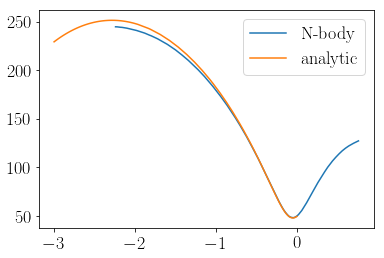

In [66]:
t5 = np.linspace(0, 3, len(R_gal5))


plot(t5-2.24, R_gal5, label='N-body')
plot(t, Rgal, label='analytic')
legend()

In [25]:
print(Rgal)

[  49.65883607   49.59531732   49.53185516 ...,  320.89257413  320.92876057
  320.96743802]


In [38]:
print(xyz_sat[-1,0] - xyz_host[-1,0] , xyz_sat[-1,1] - xyz_host[-1,1], xyz_sat[-1,2] - xyz_host[-1,2],
      vxyz_sat[-1,0]-vxyz_host[-1,0], vxyz_sat[-1,1]-vxyz_host[-1,1], vxyz_sat[-1,2]-vxyz_host[-1,2])

-1.73217413137 261.616668141 242.575755871 19.343453586 37.6178113257 -102.140630192


In [26]:
len(R_gal5)

151

### ICs1
| MW ICs | LMC ICs| ICs $\vec{r}, \vec{v}$ | ICs snap_name |
| : ------- :| :--------: |:-------: |:-------: |
|MW2_1M_halo_bd_vir_011 | LMC5_450K_010 | r = (-1.73217413137 261.616668141 242.575755871), v= (19.343453586 37.6178113257 -102.140630192) | ICs1_MW2_11_LMC5_lr | 
|MW2_1M_halo_bd_vir_011 | LMC5_450K_010 | r = (11.584929 247.791118 129.901859), v=(11.910111 11.210542 -77.135969) | ICs2+MW2_11_LMC5_lr | 
|MW2_1M_halo_bd_vir_011 | LMC5_450K_010 | r = (11.584929 247.791118 129.901859), v=(11.910111 15.210542 -77.135969) | ICs3+MW2_11_LMC5_lr | 
|MW2_1M_halo_bd_vir_011 | LMC5_450K_010 | r = (11.584929 247.791118 129.901859), v=(11.910111 6.210542 -77.135969) | ICs4+MW2_11_LMC5_lr | 






In [39]:
!scp jngaravitoc@sftp.hpc.arizona.edu:/rsgrps/gbeslastudents/nicolas/LMCMW/simulations/LMCMW/orbits/LMC5_1M_b0_orbit_test_ics1.txt orbits/LMC5/

Password: 

In [4]:
R_gal5_ics1, x_sat_ics1, y_sat_ics1, z_sat_ics1, x_gal_ics1, y_gal_ics1, z_gal_ics1, Vgal_ics1, vx_sat_ics1, vy_sat_ics1, vz_sat_ics1, vx_gal_ics1, vy_gal_ics1, vz_gal_ics1 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics2.txt')
best_values(x_sat_ics1-x_gal_ics1, y_sat_ics1-y_gal_ics1, z_sat_ics1-z_gal_ics1, vx_sat_ics1-vx_gal_ics1, vy_sat_ics1-vy_gal_ics1, vz_sat_ics1-vz_gal_ics1)

Dr =  [-0.07769] [ 1.168036] [-0.796749] [ 1.41603418]
Dv =  [ 27.344978] [ 53.833565] [-32.322102] [ 68.48736248]


(array([ 2.12]),
 array([-0.92231]),
 array([-42.168036]),
 array([-27.203251]),
 array([-84.344978]),
 array([-279.833565]),
 array([ 253.322102]))

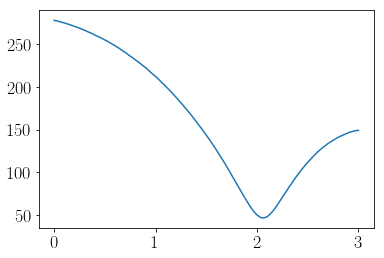

In [5]:
plot(linspace(0, 3, 151), R_gal5_ics1)
#plot(t+2.24, Rgal)

In [9]:
sat_pos = np.array([-0.9, -42.16, -27.2])
sat_vel = np.array([-84.34,-279.83, 253.32])
alpha = [0, 0.25]
host_model = ['NFW', 1.2E12, 279, 20]
disk_params = [5.78E10, 3.5, 0.53]
bulge_params = [1.4E10, 0.7]

In [10]:
t2, xyz_sat2, vxyz_sat2, xyz_host2, vxyz_host2 = soda.leapfrog.integrate_sat(time, pos_host, vel_host, 
                                                                        host_model, disk_params, 
                                                                        bulge_params, alpha=alpha,
                                                                        dt=d_t, satellite_model=sat_model,
                                                                        pos_sat=sat_pos, vel_sat=sat_vel)

Host:  0.0 0.0 0.0
Satellite 1 : -0.9 -42.16 -27.2


In [16]:
pos2, vel2 , Rgal2 = galactocentric(xyz_sat2, vxyz_sat2, xyz_host2, vxyz_host2)

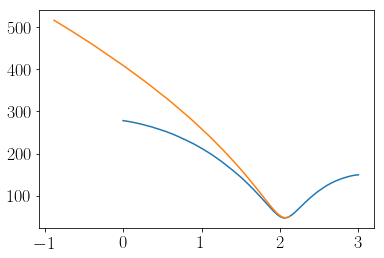

In [17]:
plot(linspace(0, 3, 151), R_gal5_ics1)
plot(t2+2.12, Rgal2)

In [18]:
R_gal5_ics3, x_sat_ics3, y_sat_ics3, z_sat_ics3, x_gal_ics3, y_gal_ics3, z_gal_ics3, Vgal_ics3, vx_sat_ics3, vy_sat_ics3, vz_sat_ics3, vx_gal_ics3, vy_gal_ics3, vz_gal_ics3 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics3.txt')
best_values(x_sat_ics3-x_gal_ics3, y_sat_ics3-y_gal_ics3, z_sat_ics3-z_gal_ics3, vx_sat_ics3-vx_gal_ics3, vy_sat_ics3-vy_gal_ics3, vz_sat_ics3-vz_gal_ics3)

Dr =  [ 0.267967] [ 3.740566] [-0.757456] [ 3.82588289]
Dv =  [ 14.248485] [ 49.755523] [-36.339995] [ 63.23943888]


(array([ 2.18]),
 array([-1.267967]),
 array([-44.740566]),
 array([-27.242544]),
 array([-71.248485]),
 array([-275.755523]),
 array([ 257.339995]))

In [19]:
R_gal5_ics4, x_sat_ics4, y_sat_ics4, z_sat_ics4, x_gal_ics4, y_gal_ics4, z_gal_ics4, Vgal_ics4, vx_sat_ics4, vy_sat_ics4, vz_sat_ics4, vx_gal_ics4, vy_gal_ics4, vz_gal_ics4 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics4.txt')
best_values(x_sat_ics4-x_gal_ics4, y_sat_ics4-y_gal_ics4, z_sat_ics4-z_gal_ics4, vx_sat_ics4-vx_gal_ics4, vy_sat_ics4-vy_gal_ics4, vz_sat_ics4-vz_gal_ics4)

Dr =  [ 0.227848] [ 1.104634] [-3.704776] [ 3.87266009]
Dv =  [ 29.461645] [ 61.60533] [-31.12065] [ 75.04465382]


(array([ 2.06]),
 array([-1.227848]),
 array([-42.104634]),
 array([-24.295224]),
 array([-86.461645]),
 array([-287.60533]),
 array([ 252.12065]))

In [20]:
R_gal5_ics4, x_sat_ics4, y_sat_ics4, z_sat_ics4, x_gal_ics4, y_gal_ics4, z_gal_ics4, Vgal_ics4, vx_sat_ics4, vy_sat_ics4, vz_sat_ics4, vx_gal_ics4, vy_gal_ics4, vz_gal_ics4 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics4.txt')
best_values(x_sat_ics4-x_gal_ics4, y_sat_ics4-y_gal_ics4, z_sat_ics4-z_gal_ics4, vx_sat_ics4-vx_gal_ics4, vy_sat_ics4-vy_gal_ics4, vz_sat_ics4-vz_gal_ics4)

Dr =  [ 0.227848] [ 1.104634] [-3.704776] [ 3.87266009]
Dv =  [ 29.461645] [ 61.60533] [-31.12065] [ 75.04465382]


(array([ 2.06]),
 array([-1.227848]),
 array([-42.104634]),
 array([-24.295224]),
 array([-86.461645]),
 array([-287.60533]),
 array([ 252.12065]))

In [7]:
R_gal5_ics5, x_sat_ics5, y_sat_ics5, z_sat_ics5, x_gal_ics5, y_gal_ics5, z_gal_ics5, Vgal_ics5, vx_sat_ics5, vy_sat_ics5, vz_sat_ics5, vx_gal_ics5, vy_gal_ics5, vz_gal_ics5 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics5.txt')
best_values(x_sat_ics5-x_gal_ics5, y_sat_ics5-y_gal_ics5, z_sat_ics5-z_gal_ics5, vx_sat_ics5-vx_gal_ics5, vy_sat_ics5-vy_gal_ics5, vz_sat_ics5-vz_gal_ics5)

Dr =  [-0.647917] [ 2.262252] [ 3.540113] [ 4.25087998]
Dv =  [ 9.564503] [ 45.308811] [-27.613392] [ 53.91537341]


(array([ 2.24]),
 array([-0.352083]),
 array([-43.262252]),
 array([-31.540113]),
 array([-66.564503]),
 array([-271.308811]),
 array([ 248.613392]))

In [8]:
R_gal5_ics6, x_sat_ics6, y_sat_ics6, z_sat_ics6, x_gal_ics6, y_gal_ics6, z_gal_ics6, Vgal_ics6, vx_sat_ics6, vy_sat_ics6, vz_sat_ics6, vx_gal_ics6, vy_gal_ics6, vz_gal_ics6 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics6.txt')
best_values(x_sat_ics6-x_gal_ics6, y_sat_ics6-y_gal_ics6, z_sat_ics6-z_gal_ics6, vx_sat_ics6-vx_gal_ics6, vy_sat_ics6-vy_gal_ics6, vz_sat_ics6-vz_gal_ics6)


Dr =  [-0.882836] [ 3.438208] [ 4.956001] [ 6.09611512]
Dv =  [ 15.565408] [ 39.968485] [-29.998239] [ 52.34172392]


(array([ 2.32]),
 array([-0.117164]),
 array([-44.438208]),
 array([-32.956001]),
 array([-72.565408]),
 array([-265.968485]),
 array([ 250.998239]))

In [9]:
R_gal5_ics7, x_sat_ics7, y_sat_ics7, z_sat_ics7, x_gal_ics7, y_gal_ics7, z_gal_ics7, Vgal_ics7, vx_sat_ics7, vy_sat_ics7, vz_sat_ics7, vx_gal_ics7, vy_gal_ics7, vz_gal_ics7 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics7.txt')
best_values(x_sat_ics7-x_gal_ics7, y_sat_ics7-y_gal_ics7, z_sat_ics7-z_gal_ics7, vx_sat_ics7-vx_gal_ics7, vy_sat_ics7-vy_gal_ics7, vz_sat_ics7-vz_gal_ics7)

Dr =  [-0.065667] [ 4.418492] [-0.20415] [ 4.42369313]
Dv =  [ 15.717753] [ 44.830864] [-36.322736] [ 59.80129829]


(array([ 2.24]),
 array([-0.934333]),
 array([-45.418492]),
 array([-27.79585]),
 array([-72.717753]),
 array([-270.830864]),
 array([ 257.322736]))

In [10]:
R_gal5_ics8, x_sat_ics8, y_sat_ics8, z_sat_ics8, x_gal_ics8, y_gal_ics8, z_gal_ics8, Vgal_ics8, vx_sat_ics8, vy_sat_ics8, vz_sat_ics8, vx_gal_ics8, vy_gal_ics8, vz_gal_ics8 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics8.txt')
best_values(x_sat_ics8-x_gal_ics8, y_sat_ics8-y_gal_ics8, z_sat_ics8-z_gal_ics8, vx_sat_ics8-vx_gal_ics8, vy_sat_ics8-vy_gal_ics8, vz_sat_ics8-vz_gal_ics8)

Dr =  [-0.611215] [ 6.454872] [ 1.089281] [ 6.57460945]
Dv =  [ 17.925894] [ 33.441661] [-39.478327] [ 54.75601034]


(array([ 2.36]),
 array([-0.388785]),
 array([-47.454872]),
 array([-29.089281]),
 array([-74.925894]),
 array([-259.441661]),
 array([ 260.478327]))

In [11]:
R_gal5_ics9, x_sat_ics9, y_sat_ics9, z_sat_ics9, x_gal_ics9, y_gal_ics9, z_gal_ics9, Vgal_ics9, vx_sat_ics9, vy_sat_ics9, vz_sat_ics9, vx_gal_ics9, vy_gal_ics9, vz_gal_ics9 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics9.txt')
best_values(x_sat_ics9-x_gal_ics9, y_sat_ics9-y_gal_ics9, z_sat_ics9-z_gal_ics9, vx_sat_ics9-vx_gal_ics9, vy_sat_ics9-vy_gal_ics9, vz_sat_ics9-vz_gal_ics9)

Dr =  [-0.210454] [ 6.199258] [ 3.793031] [ 7.27063785]
Dv =  [ 13.822082] [ 38.899221] [-28.567352] [ 50.20251931]


(array([ 2.26]),
 array([-0.789546]),
 array([-47.199258]),
 array([-31.793031]),
 array([-70.822082]),
 array([-264.899221]),
 array([ 249.567352]))

In [12]:
R_gal5_ics10, x_sat_ics10, y_sat_ics10, z_sat_ics10, x_gal_ics10, y_gal_ics10, z_gal_ics10, Vgal_ics10, vx_sat_ics10, vy_sat_ics10, vz_sat_ics10, vx_gal_ics10, vy_gal_ics10, vz_gal_ics10 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics10.txt')
best_values(x_sat_ics10-x_gal_ics10, y_sat_ics10-y_gal_ics10, z_sat_ics10-z_gal_ics10, vx_sat_ics10-vx_gal_ics10, vy_sat_ics10-vy_gal_ics10, vz_sat_ics10-vz_gal_ics10)

Dr =  [-0.819074] [-2.125335] [ 2.171038] [ 3.14663901]
Dv =  [ 23.577475] [ 60.979463] [-31.190624] [ 72.43788553]


(array([ 2.22]),
 array([-0.180926]),
 array([-38.874665]),
 array([-30.171038]),
 array([-80.577475]),
 array([-286.979463]),
 array([ 252.190624]))

In [13]:
R_gal5_ics11, x_sat_ics11, y_sat_ics11, z_sat_ics11, x_gal_ics11, y_gal_ics11, z_gal_ics11, Vgal_ics11, vx_sat_ics11, vy_sat_ics11, vz_sat_ics11, vx_gal_ics11, vy_gal_ics11, vz_gal_ics11 = reading_Nbody('LMC5/LMC5_1M_b0_orbit_test_ics11.txt')
best_values(x_sat_ics11-x_gal_ics11, y_sat_ics11-y_gal_ics11, z_sat_ics11-z_gal_ics11, vx_sat_ics11-vx_gal_ics11, vy_sat_ics11-vy_gal_ics11, vz_sat_ics11-vz_gal_ics11)

Dr =  [-0.511515] [ 2.806153] [ 5.532053] [ 6.22412666]
Dv =  [ 18.119465] [ 60.178832] [-23.346801] [ 67.04386586]


(array([ 2.2]),
 array([-0.488485]),
 array([-43.806153]),
 array([-33.532053]),
 array([-75.119465]),
 array([-286.178832]),
 array([ 244.346801]))

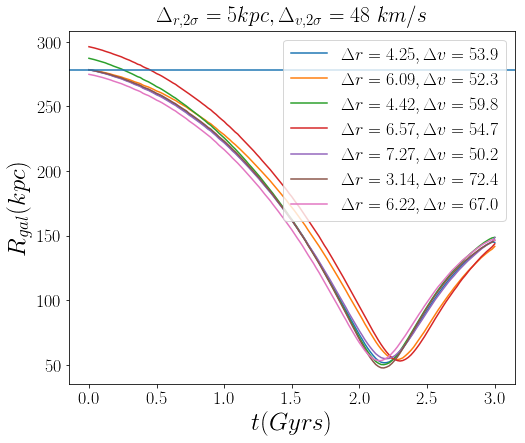

In [14]:
figure(figsize=(8,6.5))
time = linspace(0, 3, 151)
title(r'$\Delta_{r, 2 \sigma}= 5 kpc , \Delta_{v, 2\sigma}= 48\ km/s$')
plot(time, R_gal5_ics5, label='$\Delta r = 4.25, \Delta v = 53.9$')
plot(time, R_gal5_ics6, label='$\Delta r = 6.09, \Delta v = 52.3$')
plot(time, R_gal5_ics7, label='$\Delta r = 4.42, \Delta v = 59.8$')
plot(time, R_gal5_ics8, label='$\Delta r = 6.57, \Delta v = 54.7$')
plot(time, R_gal5_ics9, label='$\Delta r = 7.27, \Delta v = 50.2$')
plot(time, R_gal5_ics10, label='$\Delta r = 3.14, \Delta v = 72.4$')
plot(time, R_gal5_ics11, label='$\Delta r = 6.22, \Delta v = 67.0$')

xlabel('$t(Gyrs)$', fontsize=25)
ylabel('$R_{gal}(kpc)$', fontsize=25)
legend()


axhline(278)